<img src="C://- INSAID session/Term 1 Project/HFI project info/Image - HFI.PNG"  width="340" height="460" />

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Dataset Information](#section301)<br/>
    - 3.2 [Pre-profiling](#section302)<br/>
    - 3.3 [Pre-processing](#section303)<br/>
    - 3.4 [Post-profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Which 5 countries had the highest Economic Freedom in 2016?](#section401)<br/>
    - 4.2 [Which 5 countries had the least Economc Freedom in 2016?](#section402)<br/>
    - 4.3 [Which countries showed improvement in Economic Freedom in 2016 compared to 2015?](#section403)<br/>
    - 4.4 [Which 5 countries had the highest Personal Freedom in 2016?](#section404)<br/>
    - 4.5 [Which 5 countries had the least Personal Freedom in 2016?](#section405)<br/>
    - 4.6 [Which countries showed improvement in Personal Freedom in 2016 compared to 2015?](#section406)<br/>
    - 4.7 [Which 5 countries had the highest Human Freedom in 2016?](#section407)<br/>
    - 4.8 [Which 5 countries had the least Human Freedom in 2016?](#section408)<br/>
    - 4.9 [Which countries showed improvement in Human Freedom in 2016 compared to 2015?](#section409)<br/>
    - 4.10 [Compare the Personal and Economic Freedom scores for the top 5 countries having the highest Human Freedom.](#section410)<br/>
    - 4.11 [Average Human Freedom score from 2008 - 2016.](#section411)<br/>
    - 4.12 [Human Freedom Heatmap](#section412)<br/>
    - 4.13 [Hypothesis: New Zealand, Switzerland and Hong Kong have the highest Human Freedom score?](#section413)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The idea behind analyzing the Human Freedom Index 2018 file is to check the impact of the various factors (mentioned in section 2 below) in determining the economic and personal freedom which in turn help in determining the human freedom index for a country. Countries having a high mean value from both Economic and Personal freedom scores should have a better Human Freedom score.


<a id=section2></a>

### 2. Data Loading and Description

The Human Freedom Index presents a broad measure of human freedom, understood as the absence of coercive constraint. It uses 79 distinct indicators of personal and economic freedom in the following areas.

     - Rule of Law
     - Security and Safety
     - Movement
     - Religion
     - Association, Assembly, and Civil Society
     - Expression and Information
     - Identity and Relationships
     - Size of Government
     - Legal System and Property Rights
     - Access to Sound Money
     - Freedom to Trade Internationally
     - Regulation of Credit, Labor, and Business

The HFI is the most comprehensive freedom index so far created for a globally meaningful set of countries. The HFI covers 162 countries for 2016, the most recent year for which sufficient data are available and it includes three countries -Belarus, Iraq, and Sudan- that were added this year. The index ranks countries beginning in 2008, the earliest year for which a robust enough index could be produced.

#### Importing packages                                          

In [1]:
import numpy as np                                               
import pandas as pd                                             
import pandas_profiling
import matplotlib.pyplot as plt    
from matplotlib.pyplot import pie, axis, show
import seaborn as sns                                           
%matplotlib inline
sns.set()

#### Importing the Dataset

In [2]:
hfi_data = pd.read_csv("C:\\- INSAID session\\Term 1 Project\\workingfolder\\humanfreedomindex_2018.csv", encoding='latin-1')

<a id=section3></a>

## 3. Data Profiling

<a id=section301></a>

### 3.1 Dataset Information

In [3]:
hfi_data.shape

(1458, 123)

The dataset file has __1458 rows__ and __123 columns.__

In [4]:
hfi_data.columns.tolist()

['year',
 'ISO_code',
 'countries',
 'region',
 'pf_rol_procedural',
 'pf_rol_civil',
 'pf_rol_criminal',
 'pf_rol',
 'pf_ss_homicide',
 'pf_ss_disappearances_disap',
 'pf_ss_disappearances_violent',
 'pf_ss_disappearances_organized',
 'pf_ss_disappearances_fatalities',
 'pf_ss_disappearances_injuries',
 'pf_ss_disappearances',
 'pf_ss_women_fgm',
 'pf_ss_women_missing',
 'pf_ss_women_inheritance_widows',
 'pf_ss_women_inheritance_daughters',
 'pf_ss_women_inheritance',
 'pf_ss_women',
 'pf_ss',
 'pf_movement_domestic',
 'pf_movement_foreign',
 'pf_movement_women',
 'pf_movement',
 'pf_religion_estop_establish',
 'pf_religion_estop_operate',
 'pf_religion_estop',
 'pf_religion_harassment',
 'pf_religion_restrictions',
 'pf_religion',
 'pf_association_association',
 'pf_association_assembly',
 'pf_association_political_establish',
 'pf_association_political_operate',
 'pf_association_political',
 'pf_association_prof_establish',
 'pf_association_prof_operate',
 'pf_association_prof',
 '

In [5]:
hfi_data.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


<a id=section301></a>

In [6]:
hfi_data.tail()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.1,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.6,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.4,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0
1457,2008,ZWE,Zimbabwe,Sub-Saharan Africa,2.700000,3.991582,4.327660,3.7,7.981019,0.0,...,4.423866,0.000000,6.973482,3.369110,4.488892,4.55,138.0,4.935571,140.0,4.0


In [7]:
hfi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB


In [8]:
hfi_data.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


In [9]:
hfi_data.isnull().sum()

year                                    0
ISO_code                                0
countries                               0
region                                  0
pf_rol_procedural                     578
pf_rol_civil                          578
pf_rol_criminal                       578
pf_rol                                 80
pf_ss_homicide                         80
pf_ss_disappearances_disap             89
pf_ss_disappearances_violent           80
pf_ss_disappearances_organized        179
pf_ss_disappearances_fatalities        80
pf_ss_disappearances_injuries          80
pf_ss_disappearances                   80
pf_ss_women_fgm                       172
pf_ss_women_missing                   120
pf_ss_women_inheritance_widows        541
pf_ss_women_inheritance_daughters     541
pf_ss_women_inheritance               119
pf_ss_women                           100
pf_ss                                  80
pf_movement_domestic                   98
pf_movement_foreign               

In [10]:
hfi_data[hfi_data['hf_score'].isnull()]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
174,2015,BLR,Belarus,Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,2015,IRQ,Iraq,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,2015,SDN,Sudan,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,2014,BLR,Belarus,Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,2014,IRQ,Iraq,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,2014,SDN,Sudan,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,2013,BLR,Belarus,Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,2013,IRQ,Iraq,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,2013,LAO,Laos,South Asia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,2013,LBR,Liberia,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id=section302></a>

### 3.2 Pre-profiling

In [11]:
profile = pandas_profiling.ProfileReport(hfi_data)
profile.to_file(outputfile="hfi_data_before_processing.html")

<a id=section303></a>

### 3.3 Pre-processing

Dropping all rows where column hf_score has NaN as there is no data available and which also will not help in 
analysis. 

In [12]:
hfi_data = hfi_data.dropna(axis=0, subset=['hf_score'])

In [13]:
hfi_data[hfi_data['hf_score'].isnull()]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile


In [14]:
hfi_data.info()                   # above mentioned 80 rows dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.3+ MB


Dropping the following columns as the data from these columns are already derived into the mentioned columns:
 - pf_association_political_establish    -  Data captured in pf_association_political
 - pf_association_political_operate    -  Data captured in pf_association_political
 - pf_association_prof_establish        -  Data captured in pf_association_prof
 - pf_association_prof_operate            -  Data captured in pf_association_prof
 - pf_association_sport_establish        -  Data captured in pf_association_sport
 - pf_association_sport_operate        -  Data captured in pf_association_sport


In [15]:
hfi_data.drop('pf_association_political_establish', axis = 1,inplace = True)
hfi_data.drop('pf_association_political_operate', axis = 1,inplace = True)
hfi_data.drop('pf_association_prof_establish', axis = 1,inplace = True)
hfi_data.drop('pf_association_prof_operate', axis = 1,inplace = True)
hfi_data.drop('pf_association_sport_establish', axis = 1,inplace = True)
hfi_data.drop('pf_association_sport_operate', axis = 1,inplace = True)

In [16]:
hfi_data.info()                             # above mentioned 6 columns dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1457
Columns: 117 entries, year to hf_quartile
dtypes: float64(113), int64(1), object(3)
memory usage: 1.2+ MB


Dropping the following columns as the data from these columns are already derived into the mentioned columns:
  - pf_rol_procedural	  		 - Data captured in 	pf_rol
  - pf_rol_civil	        		 - Data captured in 	pf_rol
  - pf_rol_criminal			 - Data captured in 	pf_rol
  - pf_ss_disappearances_disap		 - Data captured in 	pf_ss_disappearances
  - pf_ss_disappearances_violent		 - Data captured in 	pf_ss_disappearances
  - pf_ss_disappearances_organized	 - Data captured in 	pf_ss_disappearances
  - pf_ss_disappearances_fatalities	 - Data captured in 	pf_ss_disappearances
  - pf_ss_disappearances_injuries	 - Data captured in 	pf_ss_disappearances
  - pf_ss_women_inheritance_widows	 - Data captured in 	pf_ss_women_inheritance
  - pf_ss_women_inheritance_daughters	 - Data captured in 	pf_ss_women_inheritance
  - pf_movement_domestic	 		 - Data captured in 	pf_movement
  - pf_movement_foreign			 - Data captured in 	pf_movement
  - pf_movement_women			 - Data captured in 	pf_movement
  - pf_religion_estop_establish		 - Data captured in 	pf_religion
  - pf_religion_estop_operate		 - Data captured in 	pf_religion
  - pf_religion_estop			 - Data captured in 	pf_religion
  - pf_religion_harassment		 - Data captured in 	pf_religion
  - pf_religion_restrictions		 - Data captured in 	pf_religion
  - pf_expression_killed	 		 - Data captured in 	pf_expression
  - pf_expression_jailed	 		 - Data captured in 	pf_expression
  - pf_expression_influence		 - Data captured in 	pf_expression
  - pf_expression_control		 - Data captured in 	pf_expression
  - pf_expression_cable	 		 - Data captured in 	pf_expression
  - pf_expression_newspapers		 - Data captured in 	pf_expression
  - pf_expression_internet		 - Data captured in 	pf_expression
  - pf_identity_parental_marriage	 - Data captured in 	pf_identity_parental
  - pf_identity_parental_divorce		 - Data captured in 	pf_identity_parental
  - pf_identity_sex_male	 		 - Data captured in 	pf_identity_sex
  - pf_identity_sex_female		 - Data captured in 	pf_identity_sex
  - ef_government_tax_income		 - Data captured in 	ef_government_tax
  - ef_government_tax_payroll		 - Data captured in 	ef_government_tax
  - ef_trade_regulatory_nontariff	 - Data captured in 	ef_trade_regulatory
  - ef_trade_regulatory_compliance	 - Data captured in 	ef_trade_regulatory
  - ef_trade_movement_foreign		 - Data captured in 	ef_trade_movement
  - ef_trade_movement_capital		 - Data captured in 	ef_trade_movement
  - ef_trade_movement_visit		 - Data captured in 	ef_trade_movement
  - ef_regulation_credit_ownership	 - Data captured in 	ef_regulation_credit
  - ef_regulation_credit_private	 	 - Data captured in 	ef_regulation_credit
  - ef_regulation_credit_interest	 - Data captured in 	ef_regulation_credit
  - ef_regulation_labor_minwage		 - Data captured in 	ef_regulation_labor
  - ef_regulation_labor_firing		 - Data captured in 	ef_regulation_labor
  - ef_regulation_labor_bargain		 - Data captured in 	ef_regulation_labor
  - ef_regulation_labor_hours		 - Data captured in 	ef_regulation_labor
  - ef_regulation_labor_dismissal	 - Data captured in 	ef_regulation_labor
  - ef_regulation_labor_conscription	 - Data captured in 	ef_regulation_labor
  - ef_regulation_business_adm		 - Data captured in 	ef_regulation_business
  - ef_regulation_business_bureaucracy	 - Data captured in 	ef_regulation_business
  - ef_regulation_business_start		 - Data captured in 	ef_regulation_business
  - ef_regulation_business_bribes	 - Data captured in 	ef_regulation_business
  - ef_regulation_business_licensing	 - Data captured in 	ef_regulation_business
  - ef_regulation_business_compliance	 - Data captured in 	ef_regulation_business


In [17]:
hfi_data.drop(['pf_rol_procedural',
'pf_rol_civil',
'pf_rol_criminal',
'pf_ss_disappearances_disap',
'pf_ss_disappearances_violent',
'pf_ss_disappearances_organized',
'pf_ss_disappearances_fatalities',
'pf_ss_disappearances_injuries',
'pf_ss_women_inheritance_widows',
'pf_ss_women_inheritance_daughters',
'pf_movement_domestic',
'pf_movement_foreign',
'pf_movement_women',
'pf_religion_estop_establish',
'pf_religion_estop_operate',
'pf_religion_estop',
'pf_religion_harassment',
'pf_religion_restrictions',
'pf_expression_killed',
'pf_expression_jailed',
'pf_expression_influence',
'pf_expression_control',
'pf_expression_cable',
'pf_expression_newspapers',
'pf_expression_internet',
'pf_identity_parental_marriage',
'pf_identity_parental_divorce',
'pf_identity_sex_male',
'pf_identity_sex_female',
'ef_government_tax_income',
'ef_government_tax_payroll',
'ef_trade_regulatory_nontariff',
'ef_trade_regulatory_compliance',
'ef_trade_movement_foreign',
'ef_trade_movement_capital',
'ef_trade_movement_visit',
'ef_regulation_credit_ownership',
'ef_regulation_credit_private',
'ef_regulation_credit_interest',
'ef_regulation_labor_minwage',
'ef_regulation_labor_firing',
'ef_regulation_labor_bargain',
'ef_regulation_labor_hours',
'ef_regulation_labor_dismissal',
'ef_regulation_labor_conscription',
'ef_regulation_business_adm',
'ef_regulation_business_bureaucracy',
'ef_regulation_business_start',
'ef_regulation_business_bribes',
'ef_regulation_business_licensing',
'ef_regulation_business_compliance'], axis=1, inplace=True)

In [18]:
hfi_data.shape

(1378, 66)

Dropping the following columns as the data from these columns are already derived into the mentioned columns:
  - pf_ss_women_fgm	 	 - Data captured in pf_ss_women
  - pf_ss_women_missing	 	 - Data captured in pf_ss_women
  - pf_ss_women_inheritance	 - Data captured in pf_ss_women
  - pf_ss_homicide		 - Data captured in pf_ss
  - pf_ss_disappearances	 - Data captured in pf_ss
  - pf_ss_women	 		 - Data captured in pf_ss
  - pf_identity_legal		 - Data captured in pf_identity
  - pf_identity_parental	 - Data captured in pf_identity
  - pf_identity_sex		 - Data captured in pf_identity
  - pf_identity_divorce	 	 - Data captured in pf_identity
  - ef_government_consumption	 - Data captured in ef_government
  - ef_government_transfers	 - Data captured in ef_government
  - ef_government_enterprises	 - Data captured in ef_government
  - ef_government_tax		 - Data captured in ef_government
  - ef_legal_judicial		 - Data captured in ef_legal
  - ef_legal_courts		 - Data captured in ef_legal
  - ef_legal_protection		 - Data captured in ef_legal
  - ef_legal_military	 	 - Data captured in ef_legal
  - ef_legal_integrity		 - Data captured in ef_legal
  - ef_legal_enforcement	 - Data captured in ef_legal
  - ef_legal_restrictions	 - Data captured in ef_legal
  - ef_legal_police		 - Data captured in ef_legal
  - ef_legal_crime		 - Data captured in ef_legal
  - ef_legal_gender	 	 - Data captured in ef_legal
  - ef_trade_tariffs_revenue	 - Data captured in ef_trade
  - ef_trade_tariffs_mean	 - Data captured in ef_trade
  - ef_trade_tariffs_sd	 	 - Data captured in ef_trade
  - ef_trade_tariffs	 	 - Data captured in ef_trade
  - ef_trade_regulatory		 - Data captured in ef_trade
  - ef_trade_black		 - Data captured in ef_trade
  - ef_trade_movement	 	 - Data captured in ef_trade
  - ef_regulation_credit	 - Data captured in ef_regulation
  - ef_regulation_labor		 - Data captured in ef_regulation
  - ef_regulation_business	 - Data captured in ef_regulation

In [19]:
hfi_data.drop(['pf_ss_women_fgm',
'pf_ss_women_missing',
'pf_ss_women_inheritance',
'pf_ss_homicide',
'pf_ss_disappearances',
'pf_ss_women',
'pf_identity_legal',
'pf_identity_parental',
'pf_identity_sex',
'pf_identity_divorce',
'ef_government_consumption',
'ef_government_transfers',
'ef_government_enterprises',
'ef_government_tax',
'ef_legal_judicial',
'ef_legal_courts',
'ef_legal_protection',
'ef_legal_military',
'ef_legal_integrity',
'ef_legal_enforcement',
'ef_legal_restrictions',
'ef_legal_police',
'ef_legal_crime',
'ef_legal_gender',
'ef_trade_tariffs_revenue',
'ef_trade_tariffs_mean',
'ef_trade_tariffs_sd',
'ef_trade_tariffs',
'ef_trade_regulatory',
'ef_trade_black',
'ef_trade_movement',
'ef_regulation_credit',
'ef_regulation_labor',
'ef_regulation_business'], axis=1, inplace=True)

In [20]:
hfi_data.shape

(1378, 32)

In [21]:
hfi_data.isnull().sum()

year                            0
ISO_code                        0
countries                       0
region                          0
pf_rol                          0
pf_ss                           0
pf_movement                     0
pf_religion                    10
pf_association_association    249
pf_association_assembly       249
pf_association_political      249
pf_association_prof           249
pf_association_sport          249
pf_association                249
pf_expression                   0
pf_identity                     0
pf_score                        0
pf_rank                         0
ef_government                   0
ef_legal                        0
ef_money_growth                 3
ef_money_sd                     2
ef_money_inflation              2
ef_money_currency               0
ef_money                        2
ef_trade                        1
ef_regulation                   0
ef_score                        0
ef_rank                         0
hf_score      

In [22]:
hfi_data['ef_money_growth'].fillna(8.6, inplace=True)

In [23]:
hfi_data['ef_money_growth'].isnull().sum()

0

In [24]:
hfi_data['ef_money_sd'].fillna(8.3, inplace=True)
hfi_data['ef_money_inflation'].fillna(8.9, inplace=True)
hfi_data['ef_money'].fillna(8.95, inplace=True)
hfi_data["pf_religion"].fillna(7.88, inplace = True) 
hfi_data["ef_trade"].fillna(7.05, inplace = True) 

In [25]:
hfi_data.drop(['pf_association_association', 
'pf_association_assembly',
'pf_association_political',
'pf_association_prof',
'pf_association_sport',
'pf_association'], axis=1, inplace=True)

In [26]:
hfi_data.shape

(1378, 26)

In [27]:
hfi_data.isnull().sum()

year                  0
ISO_code              0
countries             0
region                0
pf_rol                0
pf_ss                 0
pf_movement           0
pf_religion           0
pf_expression         0
pf_identity           0
pf_score              0
pf_rank               0
ef_government         0
ef_legal              0
ef_money_growth       0
ef_money_sd           0
ef_money_inflation    0
ef_money_currency     0
ef_money              0
ef_trade              0
ef_regulation         0
ef_score              0
ef_rank               0
hf_score              0
hf_rank               0
hf_quartile           0
dtype: int64

In [87]:
hfi_corr_data = hfi_data.drop(['ISO_code',
'countries',                               
'year',                               
'region',
'ef_money_growth',
'ef_money_sd',
'ef_money_inflation',
'ef_money_currency',
'hf_quartile',
'pf_rank',
'ef_rank'], axis=1)
hfi_corr_data.columns

Index(['pf_rol', 'pf_ss', 'pf_movement', 'pf_religion', 'pf_expression',
       'pf_identity', 'pf_score', 'ef_government', 'ef_legal', 'ef_money',
       'ef_trade', 'ef_regulation', 'ef_score', 'hf_score', 'hf_rank'],
      dtype='object')

In [88]:
hfi_corr_data = hfi_corr_data.rename(columns={'pf_rol': 'Rule of Law',
'pf_ss':'Security and Safety', 
'pf_movement':'Movement', 
'pf_religion':'Religion', 
'pf_expression':'Expression and Information',
'pf_identity':'Identity and Relationships', 
'ef_government':'Size of Government', 
'ef_legal':'Legal System and Property Rights',
'ef_money':'Access to Sound Money',
'ef_trade':'Freedom to Trade Internationally', 
'ef_regulation':'Regulation of Credit, Labor, and Business',
'pf_score':'Personal Freedom Score',
'ef_score':'Economic Freedom Score',
'hf_score':'Human Freedom Score', 
'hf_rank':'Human Freedom Rank'})

In [89]:
hfi_corr_data.columns

Index(['Rule of Law', 'Security and Safety', 'Movement', 'Religion',
       'Expression and Information', 'Identity and Relationships',
       'Personal Freedom Score', 'Size of Government',
       'Legal System and Property Rights', 'Access to Sound Money',
       'Freedom to Trade Internationally',
       'Regulation of Credit, Labor, and Business', 'Economic Freedom Score',
       'Human Freedom Score', 'Human Freedom Rank'],
      dtype='object')

<a id=section302></a>

<a id=section304></a>

## 3.4 Post-profiling

In [28]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(hfi_data)
profile.to_file(outputfile="hfi_after_processing.html")

In [29]:
hfi_data.shape

(1378, 26)

After processing the data, the dataset does not have any missing values.
In hfi_after_processing.html report:

  - Number of variables: 27  
  - Number of observations: 1378  
  - Total Missing (%): 0.0% 

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Which 5 countries had the highest Economic Freedom in 2016 ?

In [30]:
high_ef = hfi_data.sort_values(by = ['year','ef_score'], ascending=[False,False]).head(10)
high_ef[['year','countries','ef_score']]

,year,countries,ef_score
63,2016,Hong Kong,8.97
130,2016,Singapore,8.84
107,2016,New Zealand,8.49
140,2016,Switzerland,8.39
70,2016,Ireland,8.07
155,2016,United States,8.03
53,2016,Georgia,8.02
96,2016,Mauritius,8.01
154,2016,United Kingdom,8.00
5,2016,Australia,7.98


Hong Kong, Singapore, New Zealand, Switzerland and Ireland had the highest economic freedom in 2016.

Text(0, 0.5, 'Economic Freedom')

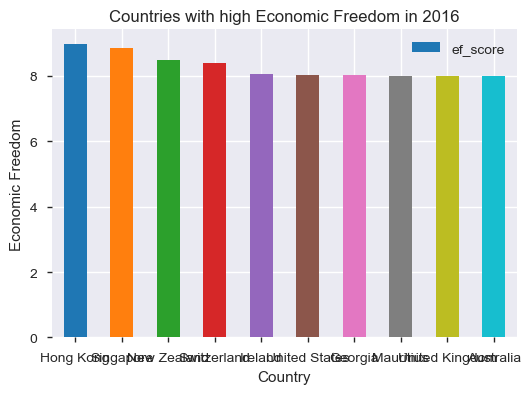

In [31]:
high_ef.plot(x = 'countries', y = 'ef_score', kind='bar', figsize = (6,4), rot=0)
plt.title('Countries with high Economic Freedom in 2016')
plt.xlabel('Country')
plt.ylabel('Economic Freedom')

<a id=section402></a>

### 4.2 Which 5 countries had the least Economc Freedom in 2016 ?

First of all looking at how __Age is varying with gender.__

In [32]:
low_ef = hfi_data.sort_values(by = ['year','ef_score'], ascending=[False,True]).head(5)
low_ef[['year','countries','ef_score']]

,year,countries,ef_score
157,2016,Venezuela,2.88
86,2016,Libya,4.74
3,2016,Argentina,4.84
1,2016,Algeria,4.99
35,2016,"Congo, Rep. Of",5.02


Text(0, 0.5, 'Economic Freedom')

<Figure size 800x600 with 0 Axes>

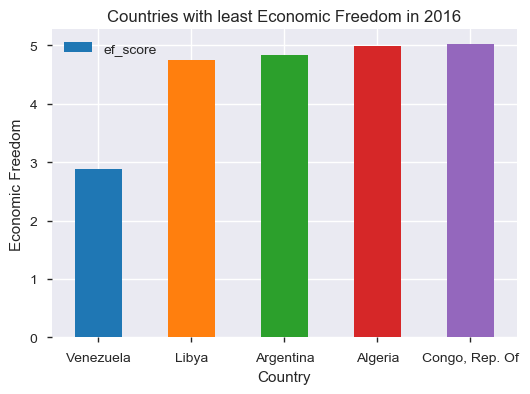

In [33]:
plt.figure(figsize = (8,6))
low_ef.plot(x = 'countries', y = 'ef_score', kind='bar', figsize = (6,4), rot=0)
plt.title('Countries with least Economic Freedom in 2016')
plt.xlabel('Country')
plt.ylabel('Economic Freedom')

Venezuela, Libya, Argentina, Algeria and Republic of Congo hd the least Economic Freedom.

<a id=section403></a>

### 4.3. Which countries showed improvement in Economic Freedom in 2016 compared to 2015 ?

In [34]:
efscore_2015 = hfi_data[(hfi_data['ef_score']>=8.00) & (hfi_data['year']==2015)]
efscore_2015[['year','countries','ef_score']].sort_values('ef_score', ascending=False)

,year,countries,ef_score
225,2015,Hong Kong,8.97
292,2015,Singapore,8.84
269,2015,New Zealand,8.48
302,2015,Switzerland,8.37
232,2015,Ireland,8.25
258,2015,Mauritius,8.02
316,2015,United Kingdom,8.01
167,2015,Australia,8.00


In [35]:
efscore_2016 = hfi_data[(hfi_data['ef_score']>=8.00) & (hfi_data['year']==2016)]
efscore_2016[['year','countries','ef_score']].sort_values('ef_score', ascending=False)

,year,countries,ef_score
63,2016,Hong Kong,8.97
130,2016,Singapore,8.84
107,2016,New Zealand,8.49
140,2016,Switzerland,8.39
70,2016,Ireland,8.07
155,2016,United States,8.03
53,2016,Georgia,8.02
96,2016,Mauritius,8.01
154,2016,United Kingdom,8.00


In [36]:
ef_score = pd.merge(left=efscore_2015, right=efscore_2016, on = 'countries')
ef_score[['countries','year_x','ef_score_x','year_y','ef_score_y']]

,countries,year_x,ef_score_x,year_y,ef_score_y
0,Hong Kong,2015,8.97,2016,8.97
1,Ireland,2015,8.25,2016,8.07
2,Mauritius,2015,8.02,2016,8.01
3,New Zealand,2015,8.48,2016,8.49
4,Singapore,2015,8.84,2016,8.84
5,Switzerland,2015,8.37,2016,8.39
6,United Kingdom,2015,8.01,2016,8.00


Text(0, 0.5, 'Economic Freedom')

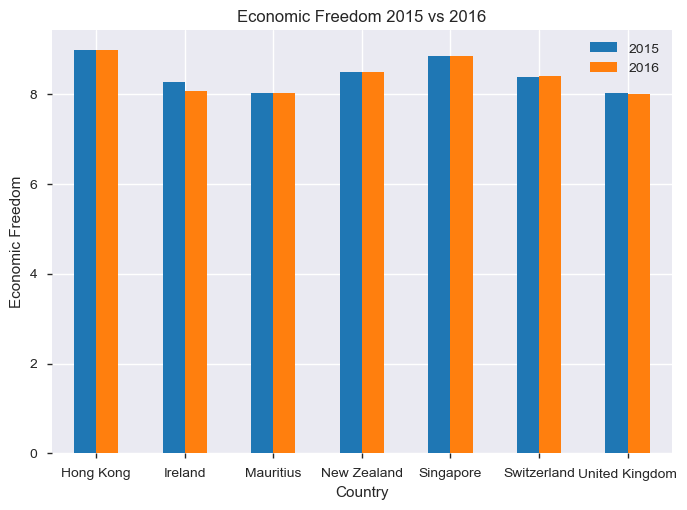

In [37]:
year_x = [8.97,8.25,8.02,8.48,8.84,8.37,8.01]
year_y = [8.97,8.07,8.01,8.49,8.84,8.39,8.00]
countries = ['Hong Kong', 'Ireland', 'Mauritius', 'New Zealand', 'Singapore', 'Switzerland', 'United Kingdom']
ef_score_df = pd.DataFrame({'year_x': year_x, 'year_y': year_y}, index=countries)
ax = ef_score_df.plot.bar(rot=0)
ax.legend(["2015", "2016"])
plt.title('Economic Freedom 2015 vs 2016')
plt.xlabel('Country')
plt.ylabel('Economic Freedom')

As seen above, Hong Kong, New Zealand, Singapore and Switzerland fared better in 2016 compared to 2015.

The above graph shows:
1. the survival rate for male is very __low__ _irrespective of the class_ he belongs to. 
2. And, the survival rate is _less_ for all the _3rd class passengers._
3. __Almost all women__ in Pclass __1 and 2 survived__ and __nearly all men__ in Pclass __2 and 3 died.__

<a id=section404></a>

### 4.4 Which 5 countries had the highest Personal Freedom in 2016?

In [38]:
high_pf = hfi_data.sort_values(by = ['year','pf_score'], ascending=[False,False]).head(5)
high_pf[['year','countries','pf_score']]

,year,countries,pf_score
106,2016,Netherlands,9.398842
111,2016,Norway,9.342481
139,2016,Sweden,9.334750
41,2016,Denmark,9.325640
49,2016,Finland,9.294368


Text(0, 0.5, 'Personal Freedom')

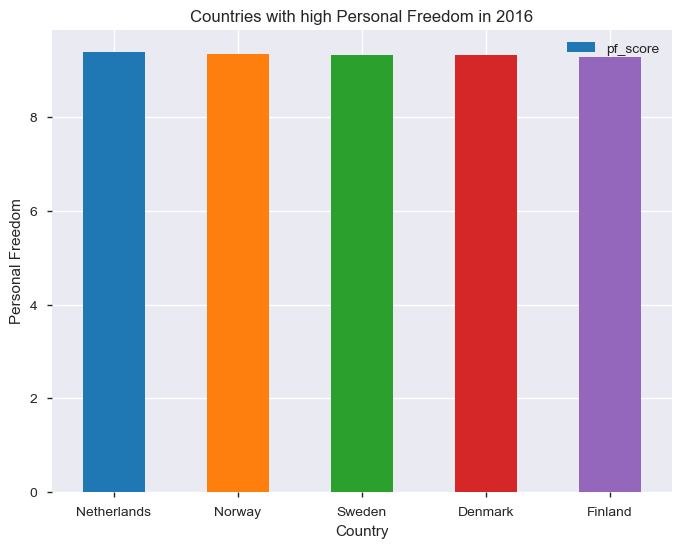

In [39]:
high_pf.plot(x = 'countries', y = 'pf_score', kind='bar', figsize = (8,6), rot=0)
plt.title('Countries with high Personal Freedom in 2016')
plt.xlabel('Country')
plt.ylabel('Personal Freedom')

Netherlands, Norway, Sweden, Denmark and Finland had the highest Personal Freedom in 2016

<a id=section405></a>

### 4.5. Which 5 countries had the least Personal Freedom in 2016?

In [40]:
low_pf = hfi_data.sort_values(by = ['year','pf_score'], ascending=[False,True]).head(5)
low_pf[['year','countries','pf_score']]

,year,countries,pf_score
159,2016,"Yemen, Rep.",2.166555
141,2016,Syria,2.511654
69,2016,Iraq,3.116028
86,2016,Libya,3.880566
44,2016,Egypt,3.894554


Text(0, 0.5, 'Personal Freedom')

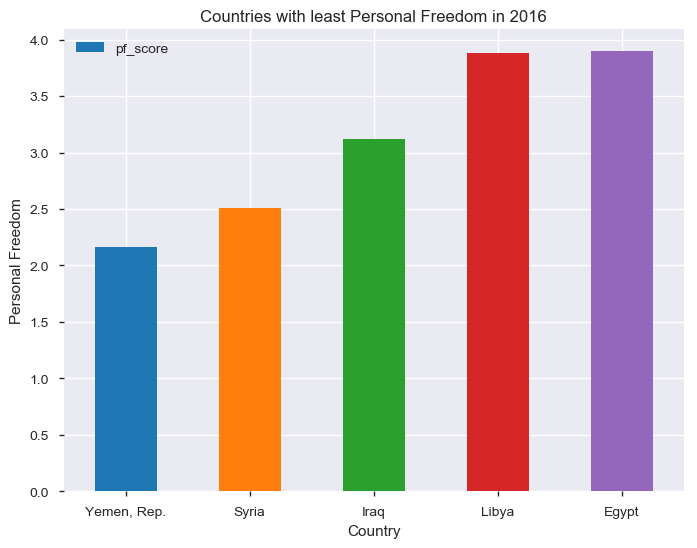

In [41]:
low_pf.plot(x = 'countries', y = 'pf_score', kind='bar', figsize=(8,6), rot=0)
plt.title('Countries with least Personal Freedom in 2016')
plt.xlabel('Country')
plt.ylabel('Personal Freedom')

Rep. of Yemen, Syria, Iraq, Libya and Egypt had the least Personal Freedom

<a id=section406></a>

### 4.6 Which countries showed improvement in Personal Freedom in 2016 compared to 2015?

In [42]:
pfscore_2015 = hfi_data[(hfi_data['pf_score']>=9.00) & (hfi_data['year']==2015)]
pfscore_2015[['year','countries','pf_score']].sort_values('pf_score', ascending=False).head(10)

,year,countries,pf_score
211,2015,Finland,9.407869
273,2015,Norway,9.388992
168,2015,Austria,9.379794
268,2015,Netherlands,9.366518
203,2015,Denmark,9.336046
250,2015,Luxembourg,9.329334
301,2015,Sweden,9.319149
216,2015,Germany,9.290914
269,2015,New Zealand,9.273780
302,2015,Switzerland,9.258916


In [43]:
pfscore_2016 = hfi_data[(hfi_data['pf_score']>=9.00) & (hfi_data['year']==2016)]
pfscore_2016[['year','countries','pf_score']].sort_values('pf_score', ascending=False).head(10)

,year,countries,pf_score
106,2016,Netherlands,9.398842
111,2016,Norway,9.342481
139,2016,Sweden,9.334750
41,2016,Denmark,9.325640
49,2016,Finland,9.294368
107,2016,New Zealand,9.284819
88,2016,Luxembourg,9.257402
6,2016,Austria,9.246948
54,2016,Germany,9.235191
140,2016,Switzerland,9.185518


In [44]:
pf_score = pd.merge(left=pfscore_2015, right=pfscore_2016, on='countries')
pf_score[['countries','year_x','pf_score_x','year_y','pf_score_y']].sort_values(by = ['pf_score_y'], ascending = False).head(10)

,countries,year_x,pf_score_x,year_y,pf_score_y
9,Netherlands,2015,9.366518,2016,9.398842
11,Norway,2015,9.388992,2016,9.342481
13,Sweden,2015,9.319149,2016,9.334750
4,Denmark,2015,9.336046,2016,9.325640
5,Finland,2015,9.407869,2016,9.294368
10,New Zealand,2015,9.273780,2016,9.284819
8,Luxembourg,2015,9.329334,2016,9.257402
1,Austria,2015,9.379794,2016,9.246948
6,Germany,2015,9.290914,2016,9.235191
14,Switzerland,2015,9.258916,2016,9.185518


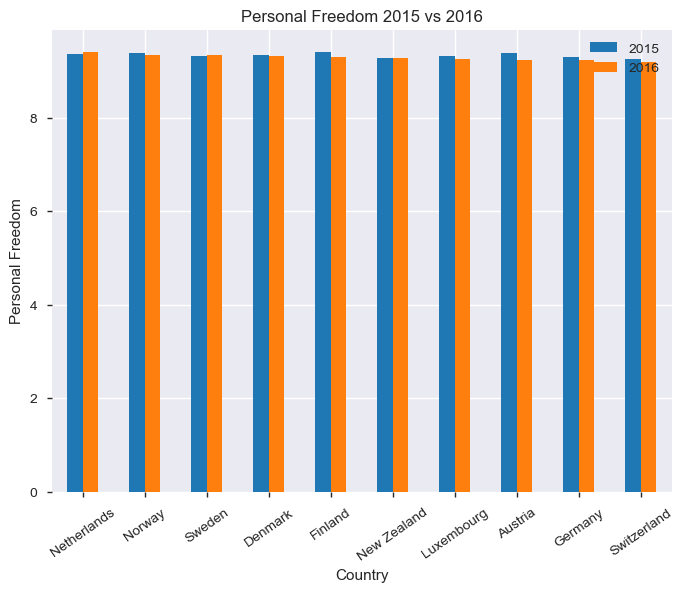

In [45]:
year_x = [9.366518, 9.388992, 9.319149, 9.336046, 9.407869, 9.27378, 9.329334, 9.379794, 9.290914, 9.258916]
year_y = [9.398842, 9.342481, 9.33475, 9.32564, 9.294368,9.284819, 9.257402, 9.246948, 9.235191, 9.185518]
countries = ['Netherlands', 'Norway', 'Sweden', 'Denmark', 'Finland', 'New Zealand', 'Luxembourg', 'Austria', 'Germany', 'Switzerland']
pf_score_df = pd.DataFrame({'year_x': year_x, 'year_y': year_y}, index=countries)
ax = pf_score_df.plot.bar(figsize = (8,6), rot=35)
ax.legend(["2015", "2016"])
plt.title('Personal Freedom 2015 vs 2016')
plt.xlabel('Country')
plt.ylabel('Personal Freedom')
plt.show()

Netherlands, Sweden and New Zealand fared better in 2016 compared to 2015.

<a id=section407></a>

### 4.7 Which 5 countries had the highest Human Freedom in 2016?

In [46]:
high_hf = hfi_data.sort_values(by = ['year','hf_score'], ascending=[False,False]).head(5)
high_hf[['year','countries','hf_score']]

,year,countries,hf_score
107,2016,New Zealand,8.887410
140,2016,Switzerland,8.787759
63,2016,Hong Kong,8.776840
5,2016,Australia,8.582219
27,2016,Canada,8.565863


Text(0, 0.5, 'Human Freedom')

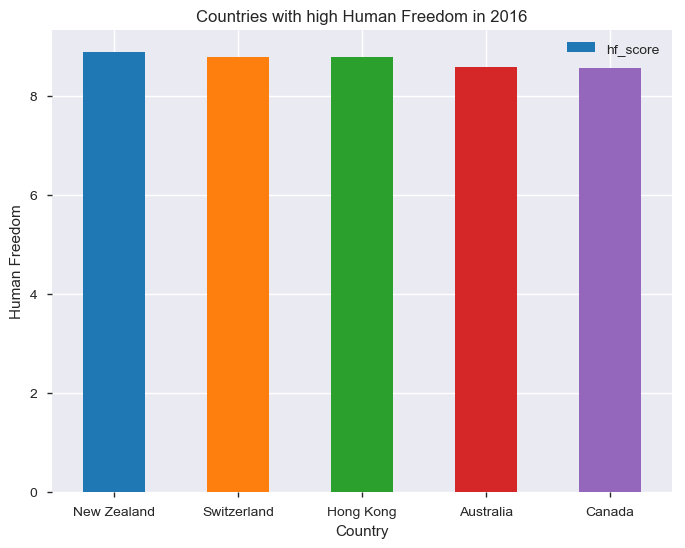

In [47]:
high_hf.plot(x = 'countries', y = 'hf_score', kind='bar', figsize=(8,6), rot=0)
plt.title('Countries with high Human Freedom in 2016')
plt.xlabel('Country')
plt.ylabel('Human Freedom')

<a id=section408></a>

### 4.8 Which 5 countries had the least Human Freedom in 2016?

In [48]:
low_hf = hfi_data.sort_values(by = ['year','hf_score'], ascending=[False,True]).head(5)
low_hf[['year','countries','hf_score']]

,year,countries,hf_score
141,2016,Syria,3.765827
157,2016,Venezuela,4.200724
159,2016,"Yemen, Rep.",4.253278
69,2016,Iraq,4.258014
86,2016,Libya,4.310283


Text(0, 0.5, 'Human Freedom')

<Figure size 800x600 with 0 Axes>

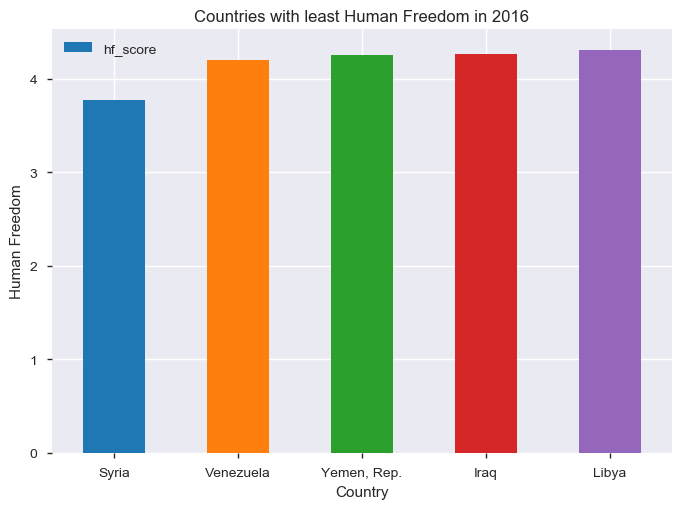

In [49]:
plt.figure(figsize = (8,6))
low_hf.plot(x = 'countries', y = 'hf_score', kind='bar', rot=0)
plt.title('Countries with least Human Freedom in 2016')
plt.xlabel('Country')
plt.ylabel('Human Freedom')

<a id=section409></a>

### 4.9 Which countries showed improvement in Human Freedom in 2016 compared to 2015?

In [50]:
hfscore_2015 = hfi_data[(hfi_data['hf_score']>=8.00) & (hfi_data['year']==2015)]
hfscore_2015[['year','countries','hf_score']].sort_values('hf_score', ascending=False).head(10)

,year,countries,hf_score
269,2015,New Zealand,8.876890
225,2015,Hong Kong,8.857581
302,2015,Switzerland,8.814458
232,2015,Ireland,8.645525
167,2015,Australia,8.607373
211,2015,Finland,8.558935
268,2015,Netherlands,8.548259
203,2015,Denmark,8.543023
316,2015,United Kingdom,8.528704
189,2015,Canada,8.520056


In [51]:
hfscore_2016 = hfi_data[(hfi_data['hf_score']>=8.00) & (hfi_data['year']==2016)]
hfscore_2016[['year','countries','hf_score']].sort_values('hf_score', ascending=False).head(10)

,year,countries,hf_score
107,2016,New Zealand,8.887410
140,2016,Switzerland,8.787759
63,2016,Hong Kong,8.776840
5,2016,Australia,8.582219
27,2016,Canada,8.565863
106,2016,Netherlands,8.554421
41,2016,Denmark,8.547820
70,2016,Ireland,8.504565
154,2016,United Kingdom,8.497918
49,2016,Finland,8.472184


In [52]:
hf_score = pd.merge(left=hfscore_2015, right=hfscore_2016, on = 'countries')
hf_score[['countries','year_x','hf_score_x','year_y','hf_score_y']].sort_values(by = ['hf_score_y'], ascending = False).head(10)

,countries,year_x,hf_score_x,year_y,hf_score_y
22,New Zealand,2015,8.876890,2016,8.887410
29,Switzerland,2015,8.814458,2016,8.787759
12,Hong Kong,2015,8.857581,2016,8.776840
0,Australia,2015,8.607373,2016,8.582219
3,Canada,2015,8.520056,2016,8.565863
21,Netherlands,2015,8.548259,2016,8.554421
7,Denmark,2015,8.543023,2016,8.547820
14,Ireland,2015,8.645525,2016,8.504565
31,United Kingdom,2015,8.528704,2016,8.497918
9,Finland,2015,8.558935,2016,8.472184


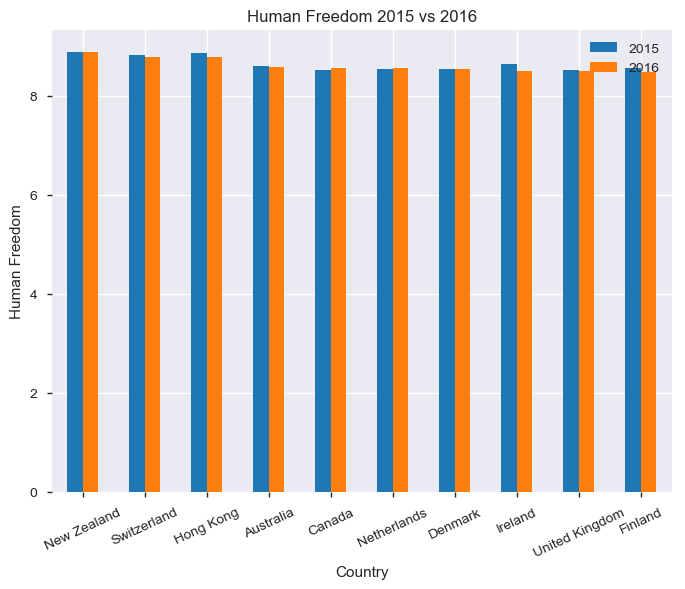

In [53]:
year_x = [8.87689, 8.814458, 8.857581, 8.607373, 8.520056, 8.548259, 8.543023, 8.645525, 8.528704, 8.558935]
year_y = [8.88741, 8.787759, 8.77684, 8.582219, 8.565863, 8.554421, 8.54782, 8.504565, 8.497918, 8.472184]
countries = ['New Zealand', 'Switzerland', 'Hong Kong', 'Australia', 'Canada', 'Netherlands', 'Denmark', 'Ireland', 'United Kingdom', 'Finland']
hf_score_df = pd.DataFrame({'year_x': year_x, 'year_y': year_y}, index=countries)
ax = hf_score_df.plot.bar(figsize = (8,6), rot=25)
ax.legend(["2015", "2016"])
plt.title('Human Freedom 2015 vs 2016')
plt.xlabel('Country')
plt.ylabel('Human Freedom')
plt.show()

New Zealand, Hong Kong, Canada, Netherlands and Denmark showed increase in Human Freedom score for 2016 compared to 2015. 

<a id=section410></a>

### 4.10 Compare the Personal and Economic Freedom scores for the top 5 countries having the highest Human Freedom.

In [54]:
high_hf_score = hfi_data.sort_values(by = ['year','hf_score'], ascending=[False,False]).head(5)
high_hf_score[['year','countries','hf_score','ef_score','pf_score']]

,year,countries,hf_score,ef_score,pf_score
107,2016,New Zealand,8.887410,8.49,9.284819
140,2016,Switzerland,8.787759,8.39,9.185518
63,2016,Hong Kong,8.776840,8.97,8.583680
5,2016,Australia,8.582219,7.98,9.184438
27,2016,Canada,8.565863,7.98,9.151727


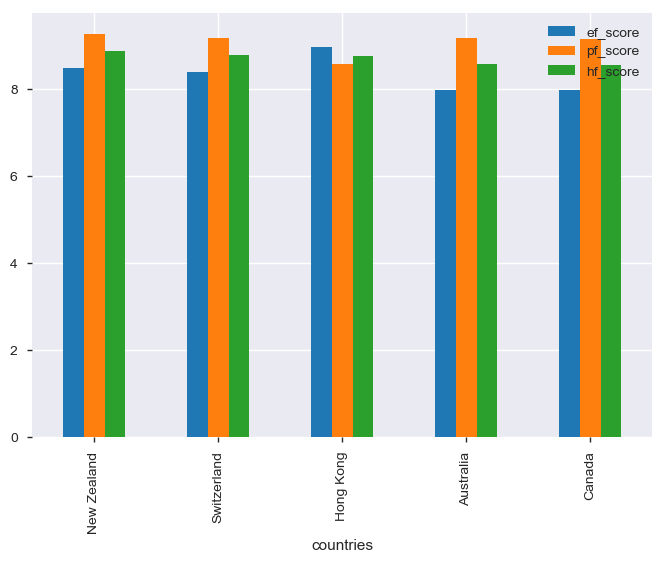

In [55]:
high_hf_score.plot(x="countries", y=["ef_score", "pf_score", "hf_score"], kind="bar")

The above graph shows the different in scores of the top 5 countries. 

<a id=section411></a>

### 4.11 Average Human Freedom score from 2008 - 2016.

In [60]:
hf_yearly_avg = (hfi_data.groupby(['year', 'hf_score'], as_index=False).mean().groupby('year')['hf_score'].mean())

year
2008    7.069785
2009    7.075678
2010    7.036396
2011    7.031203
2012    6.985917
2013    6.983139
2014    6.958734
2015    6.932810
2016    6.889871
Name: hf_score, dtype: float64

Text(0, 0.5, 'Human Freedom')

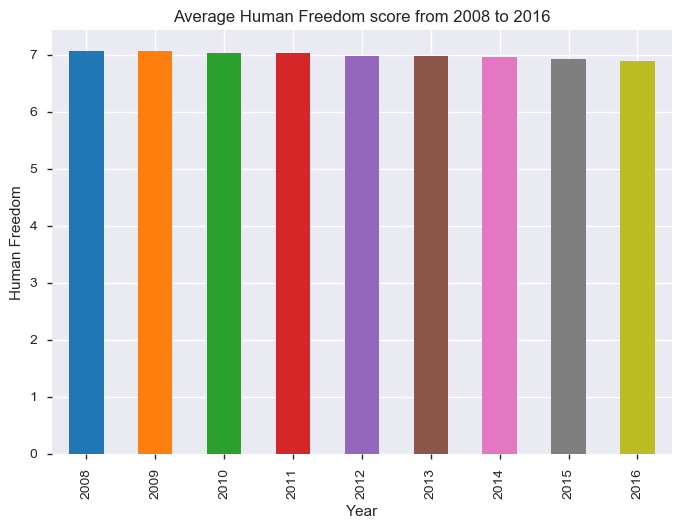

In [64]:
hf_yearly_avg.plot(x='year', y=['hf_score'], kind='bar')
plt.title('Average Human Freedom score from 2008 to 2016')
plt.xlabel('Year')
plt.ylabel('Human Freedom')

Human Freedom has decreased along the years from 7.07 in 2008 to 6.89 in 2016. 

<a id=section412></a>

### 4.12 Human Freedom Heatmap

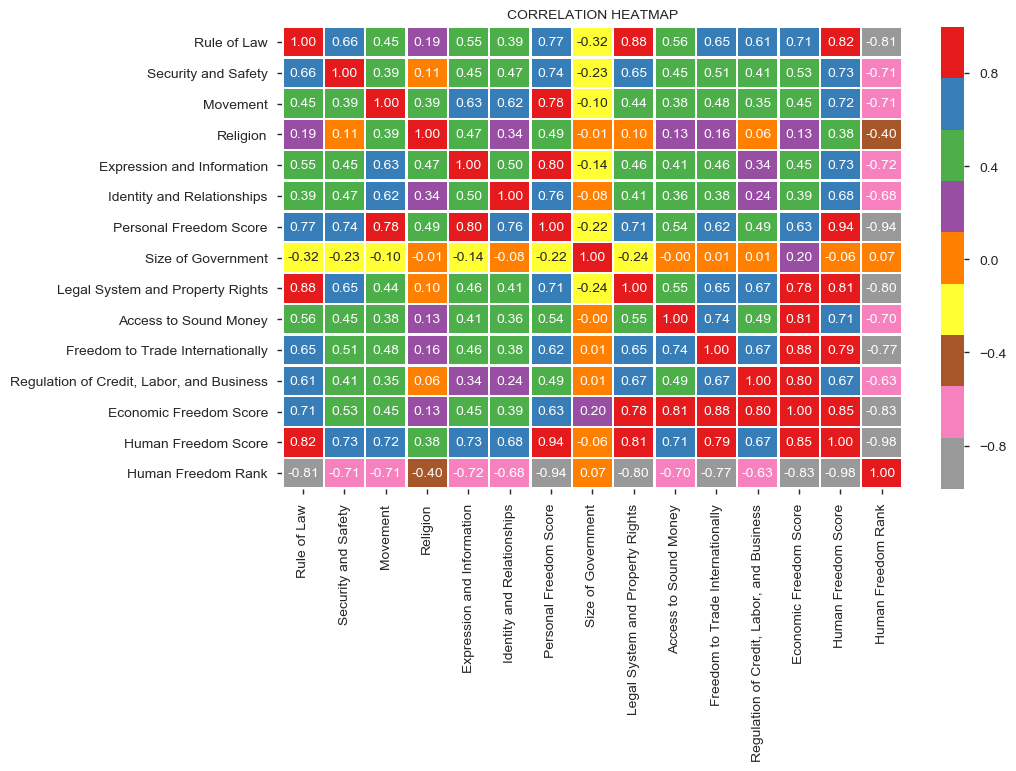

In [154]:
plt.figure(figsize=(10,6))
plt.title("CORRELATION HEATMAP",fontsize=10)
sns.heatmap(data=data,cmap="Set1_r",annot=True, fmt='.2f', linewidths=1)

Findings:
  - Values in grey are highly negatively correlated while the ones in red are highly positively correlated
  - Values in orange have little or no correlation
  - Factors that are not impacted by size of government: Money, Trade and Regulation
  - Factors that do not impact Human Freedom score: Government size
  - Factors that strongly impact Human Freedom score: Rule of Law, Legal, Freedom to Trade
  - Factors that mildly impact Human Freedom score: Religion
  - Economic Freedom is impacted strongly by: Legal, Sound Money, Trade and Regulations
  - Personal Freedom is impacted by: Freedom of Movement, Expression and Information

<a id=section413></a>

### 4.13 Hypothesis: Countries New Zealand, Switzerland and Hong Kong have the highest Human Freedom score.

Looking into questions 4.1, 4.4, 4.7 and 4.10 we see that New Zealand, Switzerland and Hong Kong have the top Human Freedom ranks due to highest average of economic and personal freedom scores.

<a id=section5></a>

## 5. Conclusion 

- The Human Freedom Index helps us understand __Human Freedom__ on the basis of factors mentioned in section 2.
- __New Zealand__, __Switzerland__, __Hong Kong__, __Australia__ and __Canada__ are the top 5 countries as per the 2016 data who have the highest level of __Human Freedom__.
- Section 4.12 explains the factors that impact Human Freedom, namely, __Rule of Law, Legal System and Property Rights and Freedom to Trade Internationally__ to a greater extent.